In [1]:
from qiskit import BasicAer, Aer
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.datasets import ad_hoc_data

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
seed = 1376
algorithm_globals.random_seed = seed

In [3]:
# Descomente la siguiente linea si desea ver las imágenes más grandes.
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [4]:
# Use ad hoc data set for training and test data
feature_dim = 2  # dimension of each data point
training_size = 20
test_size = 10

In [5]:
# training features, training labels, test features, test labels as np.array,
# one hot encoding for labels
training_features, training_labels, test_features, test_labels = \
    ad_hoc_data(
            training_size=training_size, test_size=test_size, n=feature_dim, gap=0.3)

In [ ]:
training_features

In [ ]:
training_labels

In [ ]:
test_features

In [ ]:
test_labels

In [6]:
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")
ansatz = TwoLocal(feature_map.num_qubits, ['ry', 'rz'], 'cz', reps=3)

In [7]:
print(feature_map)

     ┌──────────────────────────┐
q_0: ┤0                         ├
     │  ZZFeatureMap(x[0],x[1]) │
q_1: ┤1                         ├
     └──────────────────────────┘


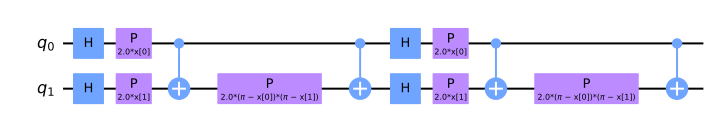

In [8]:
display(feature_map.decompose().draw('mpl'))

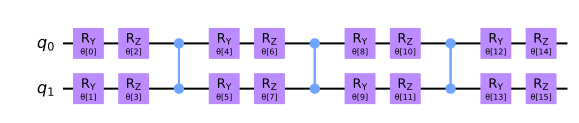

In [10]:
display(ansatz.decompose().draw('mpl'))

In [11]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [12]:
quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"), 
                                   shots=1024)
                                   
#quantum_instance = QuantumInstance(BasicAer.get_backend('statevector_simulator'),
#                                           shots=1024,
#                                           seed_simulator=seed,
#                                           seed_transpiler=seed)

In [ ]:
#vqc = VQC(feature_map=feature_map,
#          ansatz=ansatz,
#          optimizer=COBYLA(maxiter=100),
#          quantum_instance=QuantumInstance(BasicAer.get_backend('statevector_simulator'),
#                                           shots=1024,
#                                           seed_simulator=seed,
#                                           seed_transpiler=seed)
#          )

In [13]:
# construct variational quantum classifier
vqc = VQC(feature_map=feature_map,
          ansatz=ansatz,
          optimizer=COBYLA(maxiter=100),
          quantum_instance=quantum_instance
#          callback=callback_graph
         )

In [14]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
#vqc.fit(X, y_one_hot)
vqc.fit(training_features, training_labels)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

In [ ]:
# score classifier
#vqc.score(X, y_one_hot)
score = vqc.score(test_features, test_labels)
print(f"Testing accuracy: {score:0.2f}")

In [ ]:
num_inputs = 2
num_samples = 20
X = 2 * algorithm_globals.random.random([num_samples, num_inputs]) - 1
y01 = 1 * (np.sum(X, axis=1) >= 0)  # in { 0,  1}
y = 2 * y01 - 1  # in {-1, +1}
y_one_hot = np.zeros((num_samples, 2))
for i in range(num_samples):
    y_one_hot[i, y01[i]] = 1

for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

In [ ]:
y

In [ ]:
y_one_hot = np.zeros((20, 2))

# evaluate data points
#y_predict = vqc.predict(X)
y_predict = vqc.predict(test_features)


# plot results
# red == wrongly classified
for x, y_target, y_p in zip(test_features, y_one_hot, y_predict):
    if y_target[0] == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if not np.all(y_target == y_p):
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.plot([0, 6], [0, 6], "--", color="black")
plt.show()

In [ ]:
np.min(test_features), np.max(test_features)

In [ ]:
X

In [ ]:
y_one_hot

In [ ]:
y_predict

In [ ]:
test_features

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright